In [1]:
import csv
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [2]:
def test_data():
    return pd.read_csv('../data/csv/test.csv').dropna()

def macron_data():
    return pd.read_csv('../data/csv/prediction_macron.csv').dropna()

def lepen_data():
    return pd.read_csv('../data/csv/prediction_lepen.csv').dropna()

In [3]:
train = pd.read_csv('../data/csv/training.csv').dropna()

In [4]:
def logistic():
    return Pipeline(
        [('vect', CountVectorizer(token_pattern=r'[^\s]+')),
         ('tfidf', TfidfTransformer()),
         ('clf', LogisticRegression(
             solver='newton-cg',
             multi_class='multinomial',
             random_state=42,
             max_iter=100,)
         )
        ]
    )

def bayes():
    return Pipeline(
        [('vect', CountVectorizer(token_pattern=r'[^\s]+')),
         ('tfidf', TfidfTransformer()),
         ('clf', MultinomialNB()
         )
        ]
    )

def svm():
    return Pipeline(
        [('vect', CountVectorizer(token_pattern=r'[^\s]+')),
         ('tfidf', TfidfTransformer()),
         ('clf', SGDClassifier(
             loss='hinge',
             penalty='l2',
             alpha=1e-3,
             random_state=42,
             learning_rate='optimal',
             tol=None,
         )
         )
        ]
    )

def predict(pipeline, df):
    learner = pipeline.fit(train['text'], train['label'])
    df['pred'] = learner.predict(df['text'])
    return df

## Test the models on the test dataset

In [5]:
from helper import accuracy

In [6]:
logistic_test = predict(logistic(), test_data())

Accuracy: 64.684
Macro F1-score: 47.409


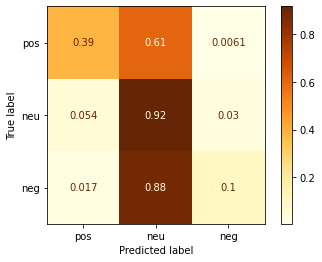

In [7]:
accuracy(logistic_test)

In [8]:
svm_test = predict(svm(), test_data())

Accuracy: 63.207
Macro F1-score: 36.747


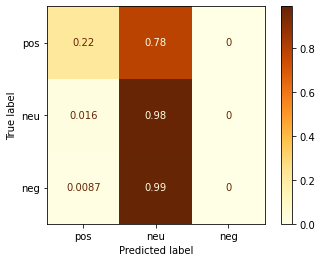

In [9]:
accuracy(svm_test)

In [10]:
nb = predict(bayes(), test_data())

Accuracy: 61.519
Macro F1-score: 31.412


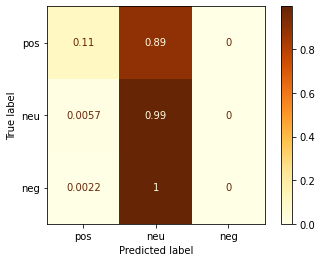

In [11]:
accuracy(nb)

## Predict the winner using the models

In [13]:
def display(df):
    df = df.groupby('pred').count()
    df['percent'] = ((df['text'] / df['text'].sum()) * 100).round(2)
    return df

#### Macron

In [14]:
macron_logistic = predict(logistic(), macron_data())
macron_bayes = predict(bayes(), macron_data())
macron_svm = predict(svm(), macron_data())

In [15]:
display(macron_logistic)

,text,percent
pred,,
neg,88,5.75
neu,1350,88.18
pos,93,6.07


In [16]:
display(macron_bayes)

,text,percent
pred,,
neg,9,0.59
neu,1501,98.04
pos,21,1.37


In [17]:
display(macron_svm)

,text,percent
pred,,
neg,2,0.13
neu,1479,96.60
pos,50,3.27
